In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import datetime
from helpers import *
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization, gradient_descent_visualization

# Load the data

In [2]:
height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

In [4]:
print(y)
print(tx)

[109.81967768  73.68895452  96.58434842 ...  58.32779473  74.38901745
  51.59669261]
[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


# Computing the Cost Function

In [5]:
def compute_mse(e):
    return 1/2 * np.mean(e**2)

def compute_loss(y, tx, w):
    e = y - tx.dot(w)
    
    return compute_mse(e)

# Grid Search

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i][j] = compute_loss(y, tx, np.array([w0[i], w1[j]]))
    
    return losses

Grid Search: loss*=18.793541019523236, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.117 seconds


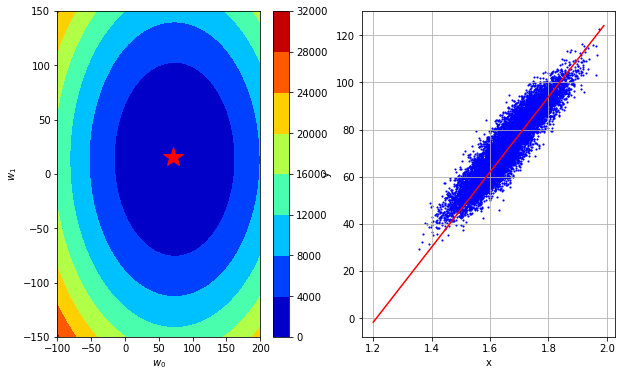

In [7]:
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    err = y - tx.dot(w)
    grad = - tx.T.dot(err) / len(y)
    
    return grad, err

In [9]:
grad, err = compute_gradient(y, tx, np.array([100, 20]))
grad

array([26.706078  ,  6.52028757])

In [10]:
grad, err = compute_gradient(y, tx, np.array([50, 10]))
grad

array([-23.293922  ,  -3.47971243])

In [11]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    conv_epsilon = 0.00001
    for n_iter in range(max_iters):
        grad, err = compute_gradient(y, tx, w)
        loss = compute_mse(err)
        w = w - gamma * grad
        
        ws.append(np.copy(w))
        losses.append(loss)
        if np.linalg.norm(ws[-1]-ws[-2])/len(w)<conv_epsilon: break
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [12]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0.0, 0.0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=51.305745401473644, w1=9.435798704492269
Gradient Descent(1/49): loss=265.3024621089598, w0=66.69746902191571, w1=12.266538315840005
Gradient Descent(2/49): loss=37.87837955044126, w0=71.31498610804834, w1=13.115760199244333
Gradient Descent(3/49): loss=17.410212120174467, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450455, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638305, w0=73.29348920882515, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412117, w1=13.

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=15, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# Stochastic gradient descent

In [14]:
for minibatch_y, minibatch_tx in batch_iter(y, tx, 3):
    print(minibatch_y)
    print(minibatch_tx)

[62.88903289 60.19843863 79.91765052]
[[ 1.         -0.91708013]
 [ 1.         -1.20131401]
 [ 1.          0.59330881]]


In [16]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    err = y - tx.dot(w)
    grad = - tx.T.dot(err) / len(y)
    
    return grad, err

def stochastic_gradient_descent(y, tx, initial_w, batch_size, num_batches, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    conv_epsilon = 0.00001
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=num_batches):
            grad, err = compute_gradient(minibatch_y, minibatch_tx, w)
            w = w - gamma * grad
            loss = compute_loss(y, tx, w)
        
        ws.append(np.copy(w))
        losses.append(loss)
        
        if np.linalg.norm(ws[-1]-ws[-2])/len(w)<conv_epsilon: break
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws


def minibatch_stochastic_gradient_descent(y, tx, initial_w, batch_size, num_batches, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    conv_epsilon = 0.00001
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=num_batches):
            grad, err = compute_gradient(minibatch_y, minibatch_tx, w)
        
        w = w - gamma * grad
        loss = compute_loss(y, tx, w)
        ws.append(np.copy(w))
        losses.append(loss)
        
        if np.linalg.norm(ws[-1]-ws[-2])/len(w)<conv_epsilon: break
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [18]:
# Define the parameters of the algorithm.
# Using 'minibatch_stochastic_gradient_descent'
max_iters = 500
gamma = 0.7
batch_size = 50
num_batches = 1

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = minibatch_stochastic_gradient_descent(
    y, tx, w_initial, batch_size, num_batches, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/499): loss=252.54389129479574, w0=51.66019188557523, w1=10.970184970091031
Gradient Descent(1/499): loss=43.07051960578972, w0=66.62158051439368, w1=10.185911811805472
Gradient Descent(2/499): loss=18.443321775606446, w0=70.91468757076619, w1=12.805834601635638
Gradient Descent(3/499): loss=16.025635147071828, w0=72.31057093479328, w1=12.920681814270129
Gradient Descent(4/499): loss=15.641877144334806, w0=72.81840773173843, w1=14.014375627745371
Gradient Descent(5/499): loss=16.113911177789042, w0=72.78777272528336, w1=14.575093431488447
Gradient Descent(6/499): loss=16.128335510174175, w0=74.51041040005069, w1=13.408640215707946
Gradient Descent(7/499): loss=15.681140512630291, w0=73.92920630094663, w1=13.912053905643116
Gradient Descent(8/499): loss=15.431411520742177, w0=73.59142238238425, w1=13.530119057166731
Gradient Descent(9/499): loss=16.297704418513693, w0=74.62326861376827, w1=13.717348049803958
Gradient Descent(10/499): loss=16.116825786253955, w0=72.4100

Gradient Descent(268/499): loss=15.936934205157486, w0=72.94530519759473, w1=14.469944224152117
Gradient Descent(269/499): loss=15.771143088784791, w0=73.60623318549234, w1=14.300061241681723
Gradient Descent(270/499): loss=15.557298787070836, w0=72.81053122005711, w1=13.149326012274939
Gradient Descent(271/499): loss=15.643003534990287, w0=73.9888261758604, w1=13.302682715395521
Gradient Descent(272/499): loss=15.435820969980222, w0=73.50208878158371, w1=13.241946175349078
Gradient Descent(273/499): loss=15.747524521210805, w0=74.00423492246031, w1=13.947397008114343
Gradient Descent(274/499): loss=15.489492101517182, w0=73.69340189401669, w1=13.261482553135199
Gradient Descent(275/499): loss=15.68938281821629, w0=72.68884414864917, w1=13.970498223323258
Gradient Descent(276/499): loss=15.483691516454606, w0=73.6727577244788, w1=13.707946504978768
Gradient Descent(277/499): loss=15.970041731193366, w0=74.0708446901645, w1=14.231176912863166
Gradient Descent(278/499): loss=15.766732467

In [19]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

In [20]:
# Define the parameters of the algorithm.
# Using 'stochastic_gradient_descent'
max_iters = 500
gamma = 0.7
batch_size = 1
num_batches = 200

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, num_batches, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/499): loss=79.43588634964064, w0=63.072503088934724, w1=8.619404588452609
Gradient Descent(1/499): loss=47.293760095084934, w0=66.78177024169256, w1=18.106549789150705
Gradient Descent(2/499): loss=86.89203279862664, w0=80.24635465586614, w1=3.7495546739600556
Gradient Descent(3/499): loss=628.0926399117714, w0=41.95466372411134, w1=-2.1172229906347617
Gradient Descent(4/499): loss=159.40478872518185, w0=70.82427716786081, w1=-3.3113166015350366
Gradient Descent(5/499): loss=34.20349686324773, w0=70.51707185036881, w1=8.009399717818455
Gradient Descent(6/499): loss=102.32268165021203, w0=68.1722148815941, w1=1.3289221835497873
Gradient Descent(7/499): loss=39.80873105769171, w0=72.59885449650045, w1=20.434032498113623
Gradient Descent(8/499): loss=15.729436811837996, w0=74.11931185490636, w1=13.556063446181163
Gradient Descent(9/499): loss=103.55092737199875, w0=73.7772885874889, w1=26.74984565777446
Gradient Descent(10/499): loss=79.26399140126509, w0=80.93984183007

Gradient Descent(101/499): loss=36.95683017538612, w0=75.83605382139326, w1=7.423356234559906
Gradient Descent(102/499): loss=44.62237423251562, w0=67.73710152932688, w1=18.732780011242394
Gradient Descent(103/499): loss=60.72797245047932, w0=81.91289502889983, w1=17.52909178578917
Gradient Descent(104/499): loss=65.19284348265543, w0=79.83896001260676, w1=21.01472329554803
Gradient Descent(105/499): loss=190.97395452318597, w0=55.43275589311882, w1=7.8091852517449745
Gradient Descent(106/499): loss=44.44507940291723, w0=73.64989296125434, w1=21.094938481825615
Gradient Descent(107/499): loss=21.90423695952655, w0=75.94367849964223, w1=15.932361754633938
Gradient Descent(108/499): loss=35.359287872821625, w0=67.07731688191717, w1=12.339264808994516
Gradient Descent(109/499): loss=84.51679053560008, w0=76.37724659908284, w1=2.1326901488025154
Gradient Descent(110/499): loss=29.15068963499522, w0=70.53604609271295, w1=17.943312327533803
Gradient Descent(111/499): loss=43.48268526931089, 

Gradient Descent(191/499): loss=41.756689001698774, w0=70.1032909580657, w1=20.00362811551023
Gradient Descent(192/499): loss=77.0671559041476, w0=62.31556596313792, w1=11.795006302659925
Gradient Descent(193/499): loss=89.33014980371482, w0=80.37369627058177, w1=23.367347145939277
Gradient Descent(194/499): loss=4687.576340296687, w0=-16.093589075258258, w1=-23.320474633148926
Gradient Descent(195/499): loss=22.902885211442086, w0=77.17122219988576, w1=13.45652059340395
Gradient Descent(196/499): loss=24.143739105416667, w0=74.86781308635808, w1=17.35767186335905
Gradient Descent(197/499): loss=37.5049176257865, w0=66.64920008040276, w1=13.772509458815149
Gradient Descent(198/499): loss=21.951348971169736, w0=75.22051018488511, w1=16.548780726613305
Gradient Descent(199/499): loss=47.9564483978811, w0=66.3892003461825, w1=17.658939625790673
Gradient Descent(200/499): loss=150.38964504497756, w0=86.71586179614023, w1=22.95911360371248
Gradient Descent(201/499): loss=37.39019868833625, 

Gradient Descent(279/499): loss=212.96737146741506, w0=53.76931554191318, w1=17.215045053618823
Gradient Descent(280/499): loss=186.36831238254297, w0=87.77350038605918, w1=1.977249270502973
Gradient Descent(281/499): loss=35.63120708044085, w0=66.98545651773767, w1=12.6467048385251
Gradient Descent(282/499): loss=121.81881319058216, w0=76.6799731627654, w1=27.671277119015162
Gradient Descent(283/499): loss=23.97521080766815, w0=70.04660639050394, w1=16.05528755451639
Gradient Descent(284/499): loss=61.87030177957483, w0=72.13450154152967, w1=23.05178493874129
Gradient Descent(285/499): loss=22.42195799752048, w0=76.51228897748913, w1=11.552472369729886
Gradient Descent(286/499): loss=18.768963550219752, w0=73.87841196162282, w1=16.01437668297216
Gradient Descent(287/499): loss=774.5555745732125, w0=106.29377255369123, w1=34.200456557287225
Gradient Descent(288/499): loss=23.89365729534246, w0=77.05545537427591, w1=11.786666203171357
Gradient Descent(289/499): loss=54.093345197309404, 

Gradient Descent(378/499): loss=103.51575349360843, w0=60.40611423451021, w1=10.291587250013288
Gradient Descent(379/499): loss=23.200276313932246, w0=71.68772222943325, w1=9.867386428040852
Gradient Descent(380/499): loss=18.757981867320094, w0=70.69721071978506, w1=13.515468738667474
Gradient Descent(381/499): loss=59.940559147407896, w0=76.07026287387121, w1=4.457446981073476
Gradient Descent(382/499): loss=25.736126878262578, w0=75.22343497022077, w1=17.600083501378602
Gradient Descent(383/499): loss=59.367319088153366, w0=81.6220624417669, w1=17.79305675881937
Gradient Descent(384/499): loss=46.13630899211777, w0=71.62309080989581, w1=5.817521796945843
Gradient Descent(385/499): loss=23.149092975522535, w0=69.51125875848416, w1=14.583283456149308
Gradient Descent(386/499): loss=29.50054361850777, w0=68.50650941761839, w1=11.1753703932656
Gradient Descent(387/499): loss=24.462620299575438, w0=77.26878591541653, w1=11.945462868540579
Gradient Descent(388/499): loss=91.95908144132399

Gradient Descent(471/499): loss=175.07912967940624, w0=84.61055865399102, w1=-0.3521427735629672
Gradient Descent(472/499): loss=57.950300207321355, w0=64.55121908707414, w1=16.428266388453615
Gradient Descent(473/499): loss=113.4620469168426, w0=82.33839813788667, w1=2.7862672686590972
Gradient Descent(474/499): loss=67.49142705423101, w0=63.42742705911269, w1=16.09951317372979
Gradient Descent(475/499): loss=26.120218658674403, w0=71.08918297278201, w1=17.554977750556745
Gradient Descent(476/499): loss=24.47242150242857, w0=69.04794858707166, w1=13.09921667150825
Gradient Descent(477/499): loss=88.941799687302, w0=63.09003992704122, w1=20.036587775815136
Gradient Descent(478/499): loss=1871.5052145808693, w0=59.17775843278418, w1=72.75004716922395
Gradient Descent(479/499): loss=52.50626467951084, w0=79.58140222096446, w1=19.371091400801408
Gradient Descent(480/499): loss=102.5479285778106, w0=70.042710129066, w1=26.276341005615425
Gradient Descent(481/499): loss=58.784358706361765, 

**NOTE**: When **outliers** occur in the dataset, because of measurement errors for instance, MSE (Mean Square Error), as implemented here above, is known to be sensitive to outliers. One way to deal with outliers is to use a more *robust* function, such as MAE (Mean Absolute Error). Nevertheless MAE is not differentiable and so we cannot use directly GD.